In [3]:
import os
import shutil
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.image as plt_image
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# # Path ke direktori dataset
# dataset_dir = '../data/javaneseScript_byPhiard/train'
# output_dir = '../data_pre/byPhiard_aug_v1'

# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     fill_mode='nearest'
# )

# # Membuat folder baru untuk menyimpan hasil augmentasi
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Loop melalui setiap kelas dalam dataset
# for class_name in os.listdir(dataset_dir):
#     class_path = os.path.join(dataset_dir, class_name)

#     # Membuat folder baru untuk setiap kelas di dalam folder output
#     output_class_path = os.path.join(output_dir, class_name)
#     if not os.path.exists(output_class_path):
#         os.makedirs(output_class_path)

#     # Mendapatkan list file gambar di setiap kelas
#     image_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))]

#     # Loop melalui setiap file gambar dan augmentasi datanya
#     for img_path in image_files:
#         img = image.load_img(img_path, target_size=(224, 224))
#         x = image.img_to_array(img)
#         x = x.reshape((1,) + x.shape)

#         # Proses augmented images
#         i = 0
#         for batch in datagen.flow(x, batch_size=32, save_to_dir=output_class_path,
#                                   save_prefix=os.path.splitext(os.path.basename(img_path))[0] + '_aug', save_format='png'):
#             i += 1
#             if i >= 610:  
#                 break
#         break
            
# print(f"\nAugmentasi Selesai!")

In [5]:
# # Dictionary untuk menyimpan jumlah data di setiap kelas
# kelas_data_count = {}

# # Loop melalui setiap kelas di dalam folder output
# for class_name in os.listdir(output_dir):
#     class_path = os.path.join(output_dir, class_name)
    
#     # Menghitung jumlah file gambar di setiap kelas
#     num_images = len([file for file in os.listdir(class_path) if file.endswith(('jpg', 'jpeg', 'png'))])
    
#     # Menyimpan jumlah data di setiap kelas ke dalam dictionary
#     kelas_data_count[class_name] = num_images

# # Menampilkan jumlah data di setiap kelas
# for class_name, count in kelas_data_count.items():
#     print(f"Kelas {class_name}: {count} gambar")


In [6]:
# import random
# import string

# # Path dataset
# data = output_dir

# # List kelas
# kelas_aksara = ['ba', 'ca', 'da', 'dha', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'tha', 'wa', 'ya']

# # Target jumlah gambar per kelas
# target_jumlah = 600

# # Loop untuk setiap kelas
# for kelas in kelas_aksara:
#     # Path kelas
#     kelas_path = os.path.join(data, kelas)
    
#     # Jumlah gambar saat ini
#     jumlah_gambar = len(os.listdir(kelas_path))
    
#     # Selisih gambar yang perlu ditambahkan
#     selisih = target_jumlah - jumlah_gambar
    
#     # Jika selisih positif, lakukan oversampling
#     if selisih > 0:
#         # Ambil sampel acak dari gambar yang sudah ada
#         gambar_oversampling = random.sample(os.listdir(kelas_path), selisih)
        
#         # Copy gambar oversampling ke dalam kelas
#         for gambar in gambar_oversampling:
#             source_path = os.path.join(kelas_path, gambar)
            
#             # Generate sufiks acak
#             sufiks_acak = ''.join(random.choices(string.ascii_letters + string.digits, k=8))
            
#             # Tentukan path tujuan dengan menambahkan sufiks acak
#             target_path = os.path.join(kelas_path, f'{os.path.splitext(gambar)[0]}_{sufiks_acak}{os.path.splitext(gambar)[1]}')
            
#             # Salin gambar ke target path
#             shutil.copy(source_path, target_path)

# # Cetak ulang jumlah gambar per kelas setelah penyamaan
# for kelas in kelas_aksara:
#     kelas_path = os.path.join(data, kelas)
#     jumlah_gambar = len(os.listdir(kelas_path))
#     print(f'Aksara {kelas} jumlah: {jumlah_gambar}')

In [7]:
# import shutil
# from sklearn.model_selection import train_test_split

# # Path ke direktori utama yang berisi sub-direktori untuk masing-masing kelas
# main_data_dir = '../data_pre/byPhiard_aug_v1'

# # Path ke direktori output untuk train dan test set
# output_dir = '../data_split/javaneseScript_ha_la'

# # Membuat sub-direktori train dan test
# train_dir = os.path.join(output_dir, 'train')
# test_dir = os.path.join(output_dir, 'test')

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # Loop melalui masing-masing kelas (diasumsikan ada 20 kelas)
# for class_name in os.listdir(main_data_dir):
#     class_path = os.path.join(main_data_dir, class_name)
    
#     # Mendapatkan list file untuk kelas tertentu
#     files = os.listdir(class_path)
    
#     # Membagi data menjadi train dan test set
#     train_files, test_files = train_test_split(files, test_size=0.3, random_state=42)
    
#     # Membuat sub-direktori untuk masing-masing kelas di train dan test set
#     train_class_dir = os.path.join(train_dir, class_name)
#     test_class_dir = os.path.join(test_dir, class_name)
    
#     os.makedirs(train_class_dir, exist_ok=True)
#     os.makedirs(test_class_dir, exist_ok=True)
    
#     # Menyalin file ke dalam masing-masing sub-direktori
#     for file in train_files:
#         shutil.copy(os.path.join(class_path, file), os.path.join(train_class_dir, file))
    
#     for file in test_files:
#         shutil.copy(os.path.join(class_path, file), os.path.join(test_class_dir, file))


In [8]:
# Tentukan konstanta
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = 2
Class = ['ha', 'la']

train_dir = "../data_split/javaneseScript_ha_la/train" 
test_dir = "../data_split/javaneseScript_ha_la/test"

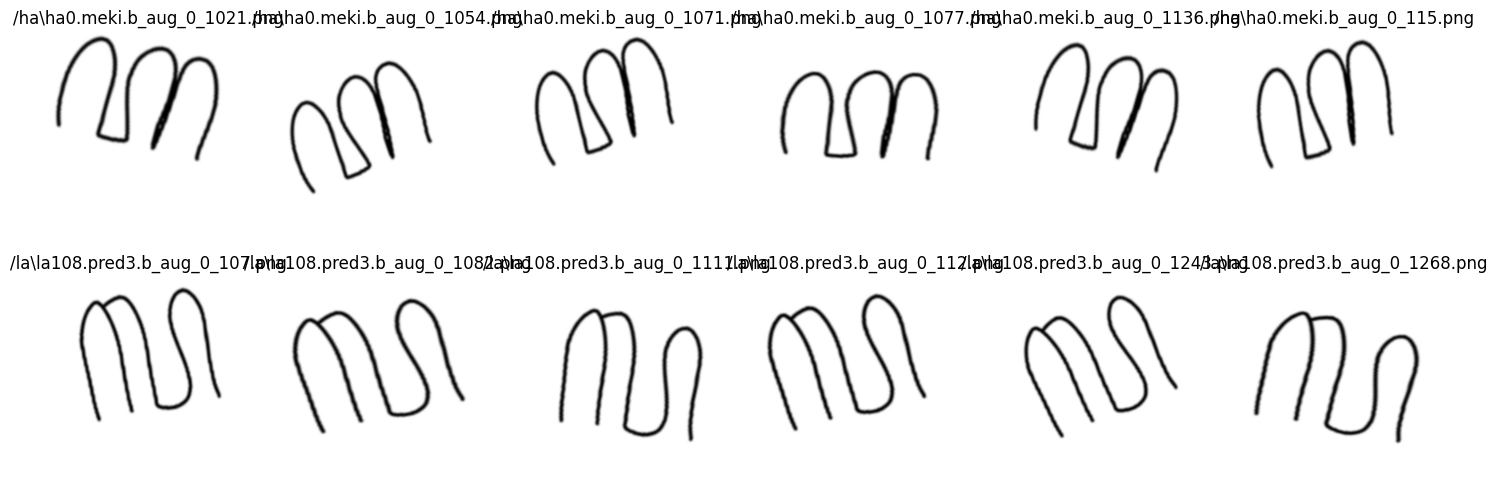

In [9]:
# Tentukan fungsi untuk menampilkan gambar
def show_random_images(directory, num_images=6):
    index = np.random.randint(20)  # Randomize the index
    plt.figure(figsize=(3*num_images, 9))

    # Buat daftar path gambar dari tiga kelas yang berbeda
    list_ha = [os.path.join('../data_split/javaneseScript_ha_la/train/ha', name) for name in os.listdir(os.path.join(directory, 'ha'))[index:index+num_images]]
    list_la = [os.path.join('../data_split/javaneseScript_ha_la/train/la', name) for name in os.listdir(os.path.join(directory, 'la'))[index:index+num_images]]

    # Tampilkan gambar
    for i, path in enumerate(list_ha+list_la):
        plt.subplot(3, num_images, i+1)
        plt.axis('off')
        plt.title(path.replace(os.path.join(train_dir), ''))
        img = plt_image.imread(path)
        plt.imshow(img)

# Panggil fungsi untuk menampilkan gambar setelah pelatihan model
show_random_images(train_dir, num_images=6)
plt.show()

In [10]:
def count_files(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        count = 0
        for name in files:
            if name.endswith(".png"):
              count = count + 1
        if count > 0:
          arr.append(count)
    return arr

def get_all_char_names(dir):
    arr = []
    for root, dirs, files in os.walk(dir):
        # print(dirs)
        arr.append(dirs)
        break
    return arr

2
[['ha', 'la']]


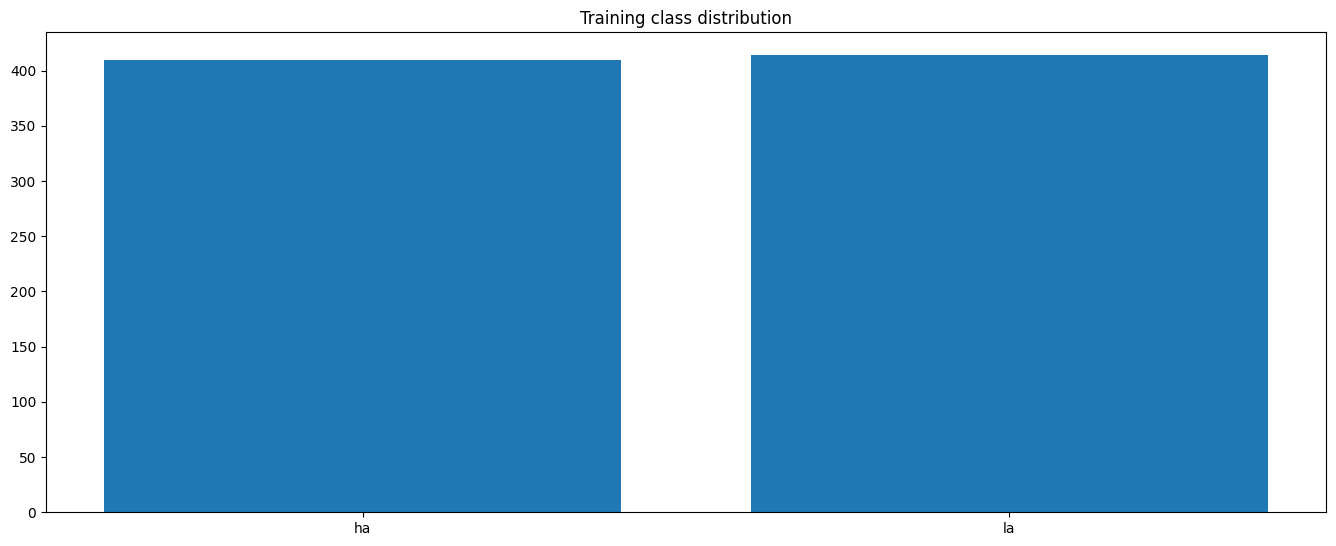

In [11]:
image_count = count_files(train_dir)
print(len(image_count))
chars = get_all_char_names(train_dir)
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(chars[0], image_count)
plt.title("Training class distribution")
plt.show()

In [12]:
# Menghitung jumlah gambar per kelas
file_list = os.listdir(train_dir)

jumlah_gambar_per_kelas = []

for kelas in file_list:
    kelas_path = os.path.join(train_dir, kelas)
    jumlah_gambar = len(os.listdir(kelas_path))
    jumlah_gambar_per_kelas.append(jumlah_gambar)

# Mengecek apakah jumlah data per kelas sudah seimbang
balanced = all(jumlah == jumlah_gambar_per_kelas[0] for jumlah in jumlah_gambar_per_kelas)

# Menampilkan pesan sesuai dengan hasil pemeriksaan
if balanced:
    print("Balanced Data !")
else:
    print("Imbalanced Data !!!\n")
    # Jika imbalanced, tampilkan jumlah data per kelas
    for kelas, jumlah in zip(file_list, jumlah_gambar_per_kelas):
        print(f'Aksara {kelas} jumlah: {jumlah}')

Imbalanced Data !!!

Aksara ha jumlah: 410
Aksara la jumlah: 414


2
[['ha', 'la']]


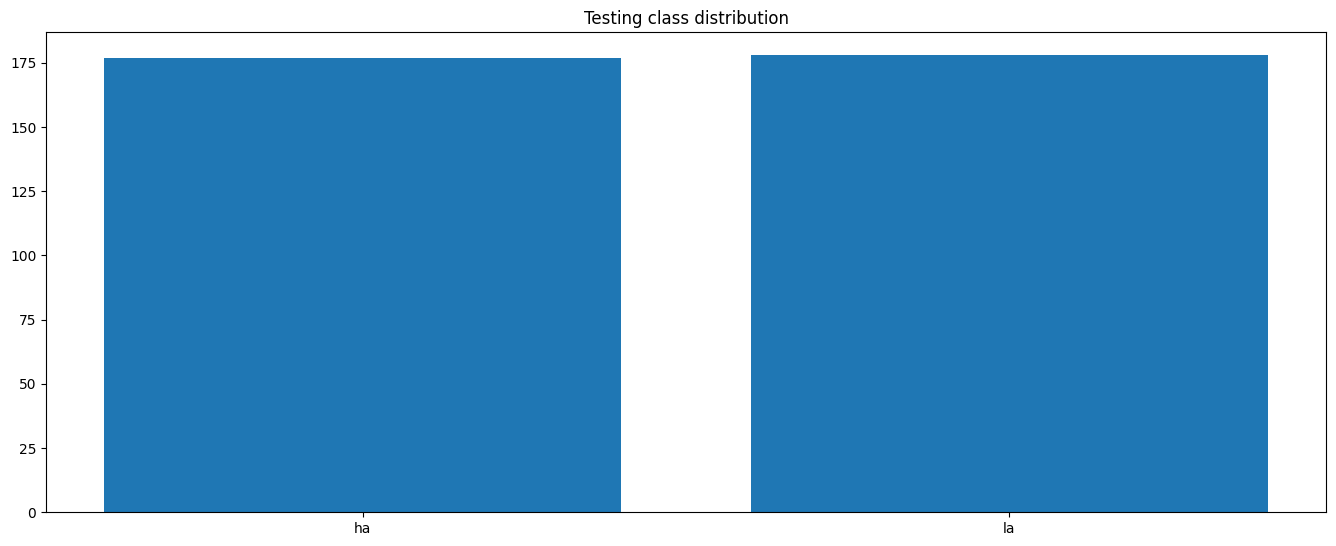

In [13]:
image_count = count_files(test_dir)
print(len(image_count))
chars = get_all_char_names(test_dir)
print(chars)

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
ax.bar(chars[0], image_count)
plt.title("Testing class distribution")
plt.show()

In [14]:
# Buat generator data dengan augmentasi data untuk data pelatihan
train_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=Class
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    classes=Class
)

Found 824 images belonging to 2 classes.
Found 355 images belonging to 2 classes.


In [15]:
# Mencari class weights untuk mengatasi ketidakseimbangan kelas
class_weights = compute_sample_weight('balanced', train_generator.classes)
class_weight = dict(enumerate(class_weights))

In [17]:
import tensorflow as tf

# Create Architecture Vgg16
def create_vgg16_model(input_shape=(150, 150, 3), num_classes=NUM_CLASSES):
    model = Sequential()

    # Blok 1
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Blok 2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Blok 3
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Blok 4
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Blok 5
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    # Fully connected layers
    model.add(Flatten(name='flatten'))

    # lapisan Dense 1
    model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(BatchNormalization())
    model.add(Dropout(0.75))

    # lapisan Dense 2
    model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
    model.add(BatchNormalization())
    model.add(Dropout(0.75))

    model.add(Dense(num_classes, activation='softmax'))

    # Adam optimizer with learning rate scheduling and gradient clipping
    opt = Adam(learning_rate=0.0001, clipvalue=0.5)  # Gradient clipping
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Membuat model VGG16
model = create_vgg16_model()

# Menampilkan ringkasan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 batch_normalization_15 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 conv2d_14 (Conv2D)          (None, 150, 150, 32)      9248      
                                                                 
 batch_normalization_16 (Ba  (None, 150, 150, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                      

In [18]:
# Fungsi untuk menetapkan learning rate secara dinamis
def lr_scheduler(epoch, lr):
    if epoch % 50 == 0 and epoch > 0:
        lr = lr * 0.9  # Contoh: Mengurangi learning rate setiap 10 epoch
    return lr

# Fungsi untuk menghentikan pelatihan jika akurasi mencapai 95%
# class AccuracyThreshold(tf.keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if logs.get('accuracy') > 0.99:
#             print("\nAkurasi mencapai 95%! Menghentikan pelatihan.")
#             self.model.stop_training = True

# Menambahkan learning rate scheduler dan early stopping
lr_schedule = LearningRateScheduler(lr_scheduler)
# accuracy_threshold = AccuracyThreshold()
# callbacks_list = [lr_schedule, accuracy_threshold]
callbacks_list = [lr_schedule]

In [19]:
import tensorflow as tf

# Melatih Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=50,
    class_weight=class_weight, 
    callbacks=callbacks_list
)


Epoch 1/50


25/25 [==============================] - 399s 15s/step - loss: 1.2516 - accuracy: 0.6629 - lr: 1.0000e-04
Epoch 2/50
25/25 [==============================] - 373s 15s/step - loss: 0.4688 - accuracy: 0.8813 - lr: 1.0000e-04
Epoch 3/50
25/25 [==============================] - 380s 15s/step - loss: 0.3034 - accuracy: 0.9369 - lr: 1.0000e-04
Epoch 4/50
25/25 [==============================] - 330s 13s/step - loss: 0.2200 - accuracy: 0.9672 - lr: 1.0000e-04
Epoch 5/50
25/25 [==============================] - 547s 22s/step - loss: 0.1893 - accuracy: 0.9773 - lr: 1.0000e-04
Epoch 6/50
25/25 [==============================] - 487s 20s/step - loss: 0.1721 - accuracy: 0.9861 - lr: 1.0000e-04
Epoch 7/50
25/25 [==============================] - 451s 18s/step - loss: 0.1907 - accuracy: 0.9811 - lr: 1.0000e-04
Epoch 8/50
25/25 [==============================] - 420s 17s/step - loss: 0.1706 - accuracy: 0.9811 - lr: 1.0000e-04
Epoch 9/50
25/25 [==============================] - 427s 17s/s

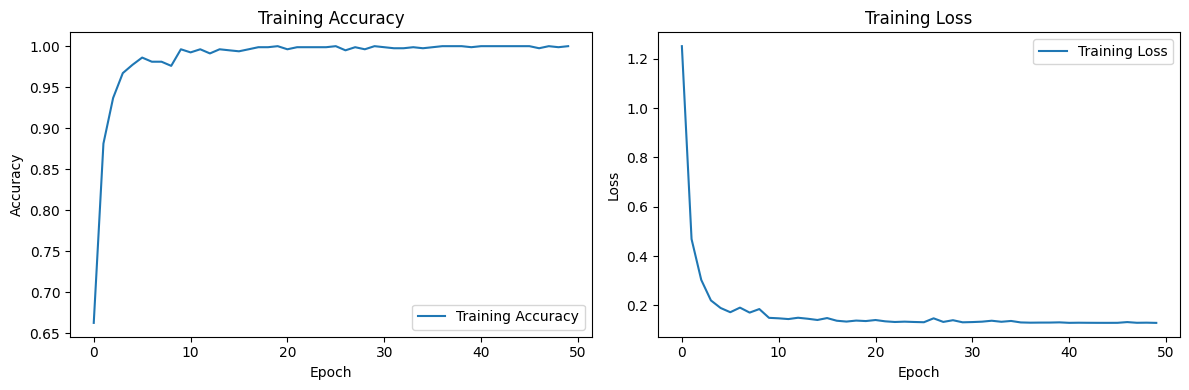

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluasi model pada data uji
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

12/12 [==============================] - 129s 8s/step - loss: 0.1270 - accuracy: 1.0000
Test Accuracy: 100.00%


In [ ]:
# # Menampilkan grafik training dan validation accuracy
# import matplotlib.pyplot as plt

# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']

# loss = history.history['loss']

# val_loss = history.history['val_loss']

# epochs_range = range(len(acc))

# plt.figure(figsize=(12, 4))

# plt.subplot(1, 2, 1)
# plt.plot(epochs_range, acc, label='Training Accuracy')
# plt.plot(epochs_range, val_acc, label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')


# plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend(loc='upper right')

# plt.tight_layout()
# plt.show()

In [23]:
# Evaluasi model pada data uji
evaluation = model.evaluate(test_generator)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

12/12 [==============================] - 129s 8s/step - loss: 0.1270 - accuracy: 1.0000
Test Accuracy: 100.00%


In [ ]:
# Menyimpan Model
model.save('../models/aksarajawa_cnn_model.h5')

In [ ]:
# Import the necessary modules
from sklearn import metrics
import math

# Buat generator data untuk data uji
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    val_dir,
    shuffle=False,
    batch_size=32,
    color_mode="rgb",
    target_size=(150, 150),
    class_mode='categorical'
)

# Ganti np.math dengan math
test_steps_per_epoch = math.ceil(test_generator.samples / test_generator.batch_size)

# Gunakan Model.predict alih-alih Model.predict_generator
predictions = model.predict(test_generator, steps=test_steps_per_epoch)

# Dapatkan kelas yang paling mungkin
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

In [ ]:
# Lakukan import untuk metrics
from sklearn import metrics

# Hitung dan tampilkan classification report
report = metrics.classification_report(true_classes,
                                       predicted_classes,
                                       target_names = class_labels)
print(report)

# Hitung dan tampilkan confusion matrix
confusion_matrix = metrics.confusion_matrix(true_classes, predicted_classes)
print(confusion_matrix)

In [ ]:
import pandas as pd
import seaborn as sn

# Buat DataFrame untuk confusion matrix
df_cm = pd.DataFrame(confusion_matrix,
                     index=[i for i in ("ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
                                        "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya")],

                     columns=[i for i in ("ba", "ca", "da", "dha", "ga", "ha", "ja", "ka", "la", "ma",
                                          "na", "nga", "nya", "pa", "ra", "sa", "ta", "tha", "wa", "ya")])
# Tampilkan heatmap
plt.figure(figsize=(15, 15))
sn.heatmap(df_cm, annot=True)

In [ ]:
# Menguji Model
model = load_model('../models/aksarajawa_cnn_model.h5')
test_image_path = '../data/databyPhiard_original/prediction/ba17.png'
img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path2 = '../data/databyPhiard_original/prediction/ba49.mine2.png'
img = image.load_img(test_image_path2, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path2)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path3 = '../data/databyPhiard_original/prediction/ca2.png'
img = image.load_img(test_image_path3, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path3)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path4 = '../data/databyPhiard_original/prediction/da5.png'
img = image.load_img(test_image_path4, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path4)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path5 = '../data/databyPhiard_original/prediction/dha11.png'
img = image.load_img(test_image_path5, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path5)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path6 = '../data/databyPhiard_original/prediction/ga16.png'
img = image.load_img(test_image_path6, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path6)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path7 = '../data/databyPhiard_original/prediction/ha0.png'
img = image.load_img(test_image_path7, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path7)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path8 = '../data/databyPhiard_original/prediction/ja12.png'
img = image.load_img(test_image_path8, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path8)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path9 = '../data/databyPhiard_original/prediction/ka4.png'
img = image.load_img(test_image_path9, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path9)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path10 = '../data/databyPhiard_original/prediction/la9.png'
img = image.load_img(test_image_path10, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path10)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path11 = '../data/databyPhiard_original/prediction/ma.0.jpg'
img = image.load_img(test_image_path11, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path11)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path12 = '../data/databyPhiard_original/prediction/ma.1.jpg'
img = image.load_img(test_image_path12, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path12)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path13 = '../data/databyPhiard_original/prediction/ma15.png'
img = image.load_img(test_image_path13, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path13)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path14 = '../data/databyPhiard_original/prediction/na1.png'
img = image.load_img(test_image_path14, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path14)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path15 = '../data/databyPhiard_original/prediction/nga19.png'
img = image.load_img(test_image_path15, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path15)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path16 = '../data/databyPhiard_original/prediction/nga220.pred.png'
img = image.load_img(test_image_path16, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path16)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path17 = '../data/databyPhiard_original/prediction/nya14.png'
img = image.load_img(test_image_path17, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path17)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path18 = '../data/databyPhiard_original/prediction/pa10.png'
img = image.load_img(test_image_path18, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path18)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path19 = '../data/databyPhiard_original/prediction/ra164.pred.png'
img = image.load_img(test_image_path19, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path19)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path20 = '../data/databyPhiard_original/prediction/ra3.png'
img = image.load_img(test_image_path20, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path20)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path21 = '../data/databyPhiard_original/prediction/sa7.png'
img = image.load_img(test_image_path21, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path21)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path22 = '../data/databyPhiard_original/prediction/ta6.png'
img = image.load_img(test_image_path22, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path22)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path23 = '../data/databyPhiard_original/prediction/tha18.png'
img = image.load_img(test_image_path23, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path23)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path24 = '../data/databyPhiard_original/prediction/wa8.png'
img = image.load_img(test_image_path24, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path24)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path25 = '../data/databyPhiard_original/prediction/ya13.png'
img = image.load_img(test_image_path25, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path25)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/nya_01.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/sa_01.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)

In [ ]:
# Menguji Model
test_image_path26 = '../data/databyPhiard_original/prediction/ha201.png'
img = image.load_img(test_image_path26, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

img = imread(test_image_path26)
plt.imshow(img)

# Perform the prediction
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions)
class_labels = list(train_generator.class_indices.keys())
predicted_class_name = class_labels[predicted_class_index]

# Print the result
print("Predicted class:", predicted_class_name)